In [61]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import random

In [62]:
data = load_iris()
shuffled_indices = np.random.permutation(len(data.target))
data.data, data.target = data.data[shuffled_indices], data.target[shuffled_indices]
train_x, test_x = data.data[:100, 1:3], data.data[100:, 1:3]
train_y, test_y = data.target[:100], data.target[100:]

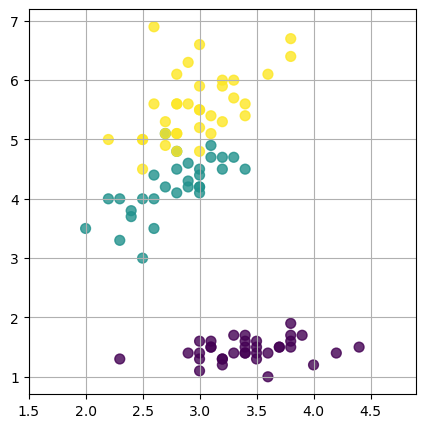

In [63]:
plt.figure(figsize=(5,5))
plt.scatter(x=train_x[:, 0], y=train_x[:, 1], s=50, alpha=0.8, c=train_y)
plt.xlim(train_x[:, 0].min() - 0.5, train_x[:, 0].max() + 0.5)
plt.grid()
plt.show()

In [64]:
def sigmoid(x: np.array, e=2.7182) -> np.array: return 1 / (1 + e ** (-x))
def reLu(x: np.array) -> np.array: return np.array([max(0, value) for value in x])
def seLu(x: np.array, e=2.7182, a=1.0507) -> np.array: return np.array([value if value >= 0 else a * (e ** value - 1) for value in x])

In [65]:
class Perceptron:
    def __init__(self, x, y, target):
        self.target = target
        self.weight = np.random.rand(x.shape[1])
        self.trainY = np.array([1 if self.target == label else 0 for label in y])
        
    def train(self, iters=10000, lr=0.01, act_func=seLu):
        for epoch in range(iters):
            indications = act_func(np.dot(train_x, self.weight))
            self.weight -= (lr / train_x.shape[0]) * np.dot(train_x.T, (indications - self.trainY))
        # for
    # train

    def __call__(self, independent):
        if type(independent) == list: independent = np.array(independent)
        return np.dot(independent, self.weight)
    # call
# class

In [66]:
first_node = Perceptron(train_x, train_y, 0)
second_node = Perceptron(train_x, train_y, 1)
third_node = Perceptron(train_x, train_y, 2)

mlp = [first_node, second_node, third_node]

In [67]:
def mlp_train(mlp: list, iters: int, lr: float, act_func):
    for node in mlp: node.train(iters=iters, lr=lr, act_func=act_func)
# mlp_train
def mlp_call(mlp: list, x: np.array): return np.array([node(x) for node in mlp])
def softmax(x: np.array) -> np.array: return np.array([np.exp(value) / np.sum(np.exp(x)) for value in x])

In [68]:
mlp_train(mlp, 1000, 0.001, seLu)

In [69]:
index = random.randrange(len(test_y))
prediction = softmax(mlp_call(mlp, test_x[index, :]))
print(f"{prediction}")
print(f"pred: {np.argmax(prediction)}, actual target: {test_y[index]}")

[0.44309197 0.33686923 0.2200388 ]
pred: 0, actual target: 0


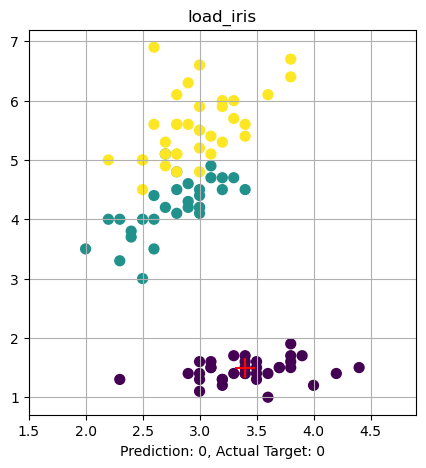

In [70]:
plt.figure(figsize=(5,5))
plt.scatter(x=train_x[:, 0], y=train_x[:, 1], s=50, alpha=1, c=train_y)
plt.scatter(x=test_x[index,0], y=test_x[index,1], c='r', s=200, marker='+')
plt.xlim(train_x[:, 0].min() - 0.5, train_x[:, 0].max() + 0.5)
plt.grid()
# plt.colorbar()
plt.xlabel(f"Prediction: {np.argmax(prediction)}, Actual Target: {test_y[index]}")
plt.title("load_iris")
plt.show()